# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.2.0


# Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

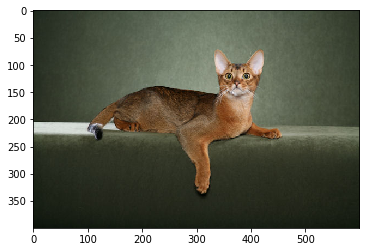

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


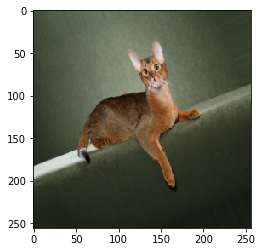

In [4]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [5]:
x.shape

(1, 256, 256, 3)

# Width and Height Shifts

In [6]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100, -50, 0, 50, 100],
    height_shift_range= [-50, 0, 50]
)

Found 1 images belonging to 1 classes.


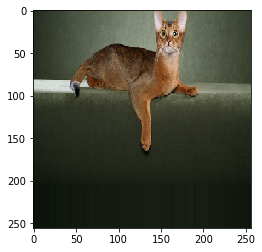

In [7]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Brightness

Found 1 images belonging to 1 classes.


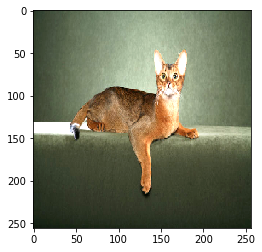

In [8]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5, 1.5)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Shear Transformation

Found 1 images belonging to 1 classes.


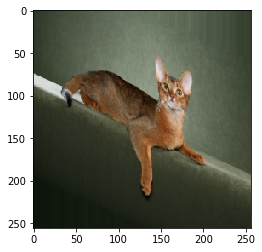

In [9]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Zoom

Found 1 images belonging to 1 classes.


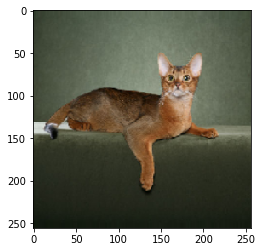

In [10]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = [0.5, 1.2]
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Channel Shift

Found 1 images belonging to 1 classes.


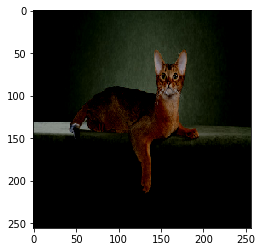

In [11]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [12]:
x.mean()

12.138305

In [13]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Flips

Found 1 images belonging to 1 classes.


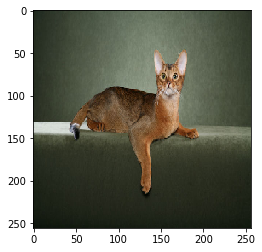

In [14]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Normalization

### Featurewise

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center= True,
    featurewise_std_normalization=True
)

generator.fit(x_train)

In [16]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.5966641 0.41459146 [[4]]
120.70756512369792


### Samplewise

In [17]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

7.947286e-08 0.99999994 [[8]]


# Rescale and Preprocessing Function

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [19]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [20]:
print(x.mean(), x.std(), y)

0.089014016 0.51447535 [[4]]
